In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
 
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
 
from keras.models import Model
np.random.seed(0)

In [2]:
# importing 60K images for training and 10K images for testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
# assert checks if the conidition is met, and when not met it displays an error message of our choice
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

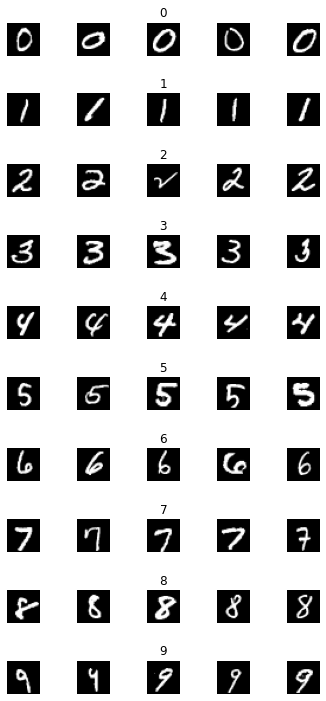

In [4]:
# list to record the no. of images in each of the 10 categories
num_of_samples = []
# creating a grid of 5 columns
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap = plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))  

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


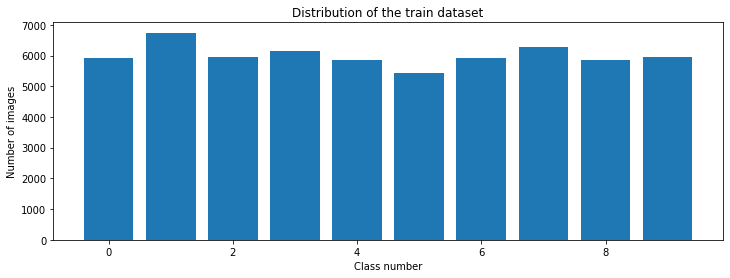

In [5]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [6]:
# using one-hot encoding to ensure that the model does not assume any relation between other classes
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# divide by 255 since each images' pixel intensities range from 0-255 and the max. values gets restricted to 1
# this scales down the features and reduces the variance
X_train = X_train/255
X_test = X_test/255

In [7]:
# define the larger model
def leNet_model():
  
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  
  # Compile model
  model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

d:\Self Driving 1\autonomous1\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
# CNNs are more computationally manageable
history = model.fit(X_train, y_train, epochs = 10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 24s 171ms/step - loss: 0.2449 - accuracy: 0.9210 - val_loss: 0.0574 - val_accuracy: 0.9823
Epoch 2/10
135/135 [==============================] - 22s 164ms/step - loss: 0.0712 - accuracy: 0.9786 - val_loss: 0.0416 - val_accuracy: 0.9873
Epoch 3/10
135/135 [==============================] - 24s 172ms/step - loss: 0.0560 - accuracy: 0.9826 - val_loss: 0.0440 - val_accuracy: 0.9888
Epoch 4/10
135/135 [==============================] - 27s 199ms/step - loss: 0.0493 - accuracy: 0.9854 - val_loss: 0.0401 - val_accuracy: 0.9892
Epoch 5/10
135/135 [==============================] - 27s 198ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.0382 - val_accuracy: 0.9897
Epoch 6/10
135/135 [==============================] - 46s 339ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0409 - val_accuracy: 0.9905
Epoch 7/10
135/135 [==============================] - 37s 277ms/step - loss: 0.0409 - accuracy: 0.9873 - val_loss: 0.0418 - val_ac

Text(0.5, 0, 'epoch')

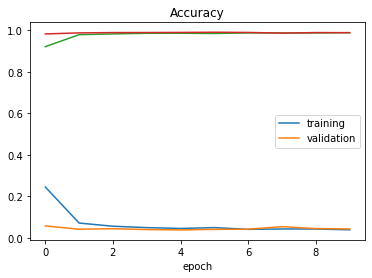

In [9]:
"""
As the epochs increase, the training and validation loss approach each other. After a certain value of epochs, the training loss is lower than
the validation loss, which is a sign of overfitting.

"""
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')
 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Test score: 0.04034853354096413
Test accuracy: 0.9898999929428101
(1, 28, 28, 1)
(1, 28, 28, 1)
predicted digit: [3]


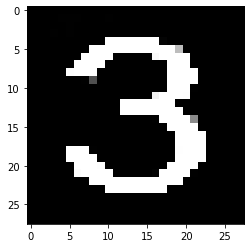

In [10]:
score = model.evaluate(X_test, y_test, verbose = 0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])
#predict internet number
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
 
r = requests.get(url, stream = True)
img = Image.open(r.raw)
plt.imshow(img, cmap = plt.get_cmap('gray'))
 
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)
 
print(img.shape)
print("predicted digit: "+str(np.argmax(model.predict(img), axis = -1)))

(1, 24, 24, 30)
(1, 10, 10, 15)


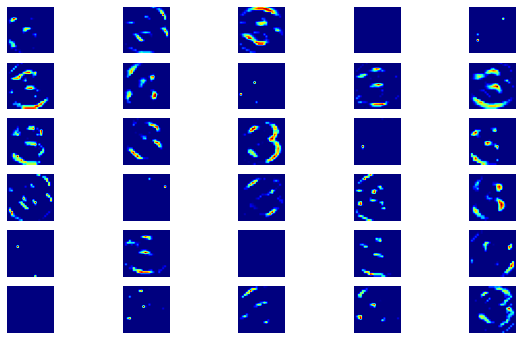

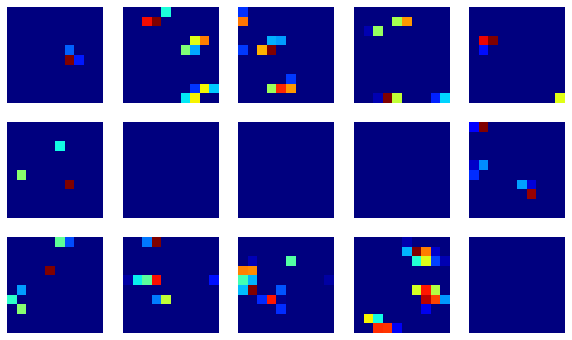

In [11]:
# visualizing the outputs from the two convolutional layers
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape)
print(visual_layer2.shape)
 
#layer 1
plt.figure(figsize = (10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap = plt.get_cmap('jet'))
    plt.axis('off')
 
#layer 2
plt.figure(figsize = (10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap = plt.get_cmap('jet'))
    plt.axis('off')